In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls /content/drive/MyDrive/dataset

add_stim.mat   combined_adhd_data.mat	  control_stim.mat  d3.mat  d6.mat	splitset
adhd_stim.mat  combined_control_data.mat  d1.mat	    d4.mat  d7.mat	sub_name_stim.mat
chan.mat       controlset		  d2.mat	    d5.mat  readme.txt	y_stim.mat


In [3]:
pip install mne

In [4]:
import numpy as np
import scipy.io as sio
import mne
import os

def get_selected_channel_indices(chan_mat_path):
    chan_info = sio.loadmat(chan_mat_path)
    chan_struct = chan_info['chan'][0]  # (1, 60) → extract the 60 elements

    all_labels = [str(chan['labels'][0]) for chan in chan_struct]

    # Your required EEG channels
    target_channels = ['FC1', 'Fz', 'C3', 'FC5', 'P3', 'Fp1', 'P7', 'O1',
                       'C4', 'Pz', 'AF4', 'P4', 'Fp2', 'P8', 'O2']

    selected_indices = [i for i, label in enumerate(all_labels) if label in target_channels]
    selected_labels = [all_labels[i] for i in selected_indices]

    return selected_indices, selected_labels

def extract_erps_from_folder(folder_path, chan_mat_path, save_path, sfreq=256.0):
    selected_indices, selected_labels = get_selected_channel_indices(chan_mat_path)
    erp_dict = {}

    if not os.path.exists(save_path):
        os.makedirs(save_path)

    for filename in os.listdir(folder_path):
        if filename.endswith('.mat'):
            filepath = os.path.join(folder_path, filename)
            mat = sio.loadmat(filepath)

            # Try common keys
            data_key = next((k for k in mat if isinstance(mat[k], np.ndarray) and mat[k].ndim == 3), None)
            if data_key is None:
                print(f"Skipping {filename}: no 3D EEG array found.")
                continue

            data = mat[data_key]  # shape: (time, channels, trials)
            print(f"{filename} original shape: {data.shape}")

            # Rearrange to (trials, channels, time)
            data = np.transpose(data, (2, 1, 0))  # from (time, channels, trials) to (trials, channels, time)

            # Select specific channels
            data = data[:, selected_indices, :]  # (trials, selected_channels, time)

            # Create MNE Info and Epochs
            info = mne.create_info(ch_names=selected_labels, sfreq=sfreq, ch_types='eeg')
            epochs = mne.EpochsArray(data, info)

            # Compute ERP (Evoked)
            evoked = epochs.average()
            erp_dict[filename] = evoked

            # Save ERP to FIF file
            fif_path = os.path.join(save_path, f"{filename.split('.')[0]}_erp.fif")
            evoked.save(fif_path)

            print(f"Processed {filename}: {data.shape[0]} epochs, {data.shape[1]} channels, {data.shape[2]} time points")
            print(f"Saved ERP to {fif_path}")

    return erp_dict

In [5]:
folder_path = '/content/drive/MyDrive/dataset/controlset'  # Path to your folder containing .mat files
chan_mat_path = '/content/drive/MyDrive/dataset/chan.mat'  # Path to your chan.mat file with channel info
save_path = '/content/drive/MyDrive/dataset/controlerps'  # Path where you want to save the ERPs

# Call the function to extract and save ERPs
erp_dict_control = extract_erps_from_folder(folder_path, chan_mat_path, save_path)

1.mat original shape: (385, 56, 281)
Not setting metadata
281 matching events found
No baseline correction applied
0 projection items activated
Processed 1.mat: 281 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/1_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/1_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


2.mat original shape: (385, 56, 262)
Not setting metadata
262 matching events found
No baseline correction applied
0 projection items activated
Processed 2.mat: 262 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/2_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/2_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


3.mat original shape: (385, 56, 295)
Not setting metadata
295 matching events found
No baseline correction applied
0 projection items activated
Processed 3.mat: 295 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/3_erp.fif
4.mat original shape: (385, 56, 229)
Not setting metadata
229 matching events found


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/3_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


No baseline correction applied
0 projection items activated
Processed 4.mat: 229 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/4_erp.fif
5.mat original shape: (385, 56, 255)
Not setting metadata
255 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/4_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


Processed 5.mat: 255 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/5_erp.fif
6.mat original shape: (385, 56, 135)
Not setting metadata
135 matching events found
No baseline correction applied
0 projection items activated
Processed 6.mat: 135 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/6_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/5_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)
<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/6_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


7.mat original shape: (385, 56, 232)
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Processed 7.mat: 232 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/7_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/7_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


8.mat original shape: (385, 56, 254)
Not setting metadata
254 matching events found
No baseline correction applied
0 projection items activated
Processed 8.mat: 254 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/8_erp.fif
9.mat original shape: (385, 56, 159)
Not setting metadata
159 matching events found
No baseline correction applied


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/8_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


0 projection items activated
Processed 9.mat: 159 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/9_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/9_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


10.mat original shape: (385, 56, 272)
Not setting metadata
272 matching events found
No baseline correction applied
0 projection items activated
Processed 10.mat: 272 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/10_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/10_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


11.mat original shape: (385, 56, 279)
Not setting metadata
279 matching events found
No baseline correction applied
0 projection items activated
Processed 11.mat: 279 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/11_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/11_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


12.mat original shape: (385, 56, 168)
Not setting metadata
168 matching events found
No baseline correction applied
0 projection items activated
Processed 12.mat: 168 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/12_erp.fif
13.mat original shape: (385, 56, 137)
Not setting metadata
137 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/12_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


Processed 13.mat: 137 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/13_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/13_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


14.mat original shape: (385, 56, 237)
Not setting metadata
237 matching events found
No baseline correction applied
0 projection items activated
Processed 14.mat: 237 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/14_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/14_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


15.mat original shape: (385, 56, 205)
Not setting metadata
205 matching events found
No baseline correction applied
0 projection items activated
Processed 15.mat: 205 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/15_erp.fif
16.mat original shape: (385, 56, 115)
Not setting metadata
115 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/15_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)
<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/16_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


Processed 16.mat: 115 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/16_erp.fif
17.mat original shape: (385, 56, 195)
Not setting metadata
195 matching events found
No baseline correction applied
0 projection items activated
Processed 17.mat: 195 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/17_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/17_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


18.mat original shape: (385, 56, 229)
Not setting metadata
229 matching events found
No baseline correction applied
0 projection items activated
Processed 18.mat: 229 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/18_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/18_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


19.mat original shape: (385, 56, 222)
Not setting metadata
222 matching events found
No baseline correction applied
0 projection items activated
Processed 19.mat: 222 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/19_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/19_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


20.mat original shape: (385, 56, 209)
Not setting metadata
209 matching events found
No baseline correction applied
0 projection items activated
Processed 20.mat: 209 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/20_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/20_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


21.mat original shape: (385, 56, 160)
Not setting metadata
160 matching events found
No baseline correction applied
0 projection items activated
Processed 21.mat: 160 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/21_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/21_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


22.mat original shape: (385, 56, 229)
Not setting metadata
229 matching events found
No baseline correction applied
0 projection items activated
Processed 22.mat: 229 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/22_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/22_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


23.mat original shape: (385, 56, 203)
Not setting metadata
203 matching events found
No baseline correction applied
0 projection items activated
Processed 23.mat: 203 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/23_erp.fif
24.mat original shape: (385, 56, 99)
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Processed 24.mat: 99 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/24_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/23_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)
<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/24_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


25.mat original shape: (385, 56, 229)
Not setting metadata
229 matching events found
No baseline correction applied
0 projection items activated
Processed 25.mat: 229 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/25_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/25_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


26.mat original shape: (385, 56, 241)
Not setting metadata
241 matching events found
No baseline correction applied
0 projection items activated
Processed 26.mat: 241 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/26_erp.fif
27.mat original shape: (385, 56, 79)
Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated
Processed 27.mat: 79 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/27_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/26_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)
<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/27_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


28.mat original shape: (385, 56, 287)
Not setting metadata
287 matching events found
No baseline correction applied
0 projection items activated
Processed 28.mat: 287 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/28_erp.fif
29.mat original shape: (385, 56, 102)
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Processed 29.mat: 102 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/29_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/28_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)
<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/29_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


30.mat original shape: (385, 56, 279)
Not setting metadata
279 matching events found
No baseline correction applied
0 projection items activated
Processed 30.mat: 279 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/30_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/30_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


31.mat original shape: (385, 56, 278)
Not setting metadata
278 matching events found
No baseline correction applied
0 projection items activated
Processed 31.mat: 278 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/31_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/31_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


32.mat original shape: (385, 56, 276)
Not setting metadata
276 matching events found
No baseline correction applied
0 projection items activated
Processed 32.mat: 276 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/32_erp.fif
33.mat original shape: (385, 56, 280)
Not setting metadata
280 matching events found
No baseline correction applied


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/32_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


0 projection items activated
Processed 33.mat: 280 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/33_erp.fif
34.mat original shape: (385, 56, 241)
Not setting metadata
241 matching events found


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/33_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


No baseline correction applied
0 projection items activated
Processed 34.mat: 241 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/34_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/34_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


35.mat original shape: (385, 56, 288)
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Processed 35.mat: 288 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/35_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/35_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


36.mat original shape: (385, 56, 273)
Not setting metadata
273 matching events found
No baseline correction applied
0 projection items activated
Processed 36.mat: 273 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/36_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/36_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


37.mat original shape: (385, 56, 267)
Not setting metadata
267 matching events found
No baseline correction applied
0 projection items activated
Processed 37.mat: 267 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/37_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/37_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


38.mat original shape: (385, 56, 259)
Not setting metadata
259 matching events found
No baseline correction applied
0 projection items activated
Processed 38.mat: 259 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/38_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/38_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


39.mat original shape: (385, 56, 273)
Not setting metadata
273 matching events found
No baseline correction applied
0 projection items activated
Processed 39.mat: 273 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/39_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/39_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


40.mat original shape: (385, 56, 279)
Not setting metadata
279 matching events found
No baseline correction applied
0 projection items activated
Processed 40.mat: 279 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/40_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/40_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


41.mat original shape: (385, 56, 292)
Not setting metadata
292 matching events found
No baseline correction applied
0 projection items activated
Processed 41.mat: 292 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/41_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/41_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


42.mat original shape: (385, 56, 290)
Not setting metadata
290 matching events found
No baseline correction applied
0 projection items activated
Processed 42.mat: 290 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/42_erp.fif
43.mat original shape: (385, 56, 277)
Not setting metadata
277 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/42_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


Processed 43.mat: 277 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/43_erp.fif
44.mat original shape: (385, 56, 278)
Not setting metadata
278 matching events found
No baseline correction applied


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/43_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


0 projection items activated
Processed 44.mat: 278 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/controlerps/44_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/controlerps/44_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


In [6]:
import numpy as np
import mne

def compute_grand_average(erp_dict):
    # Collect all the Evoked objects for averaging
    evoked_list = [evoked for evoked in erp_dict.values()]

    # Compute the grand average by averaging across all Evoked objects
    grand_average = mne.grand_average(evoked_list)

    return grand_average

In [7]:
# Compute the grand average ERP for control group
grand_average_control = compute_grand_average(erp_dict_control)

Identifying common channels ...


In [8]:
folder_path = '/content/drive/MyDrive/dataset/splitset/train'  # Path to your folder containing .mat files
chan_mat_path = '/content/drive/MyDrive/dataset/chan.mat'  # Path to your chan.mat file with channel info
save_path = '/content/drive/MyDrive/dataset/adhderps'  # Path where you want to save the ERPs

# Call the function to extract and save ERPs
erp_dict_adhd = extract_erps_from_folder(folder_path, chan_mat_path, save_path)

14_train.mat original shape: (385, 56, 238)
Not setting metadata
238 matching events found
No baseline correction applied
0 projection items activated
Processed 14_train.mat: 238 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/14_train_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/14_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


18_train.mat original shape: (385, 56, 195)
Not setting metadata
195 matching events found
No baseline correction applied
0 projection items activated
Processed 18_train.mat: 195 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/18_train_erp.fif
46_train.mat original shape: (385, 56, 270)
Not setting metadata
270 matching events found


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/18_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


No baseline correction applied
0 projection items activated
Processed 46_train.mat: 270 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/46_train_erp.fif
16_train.mat original shape: (385, 56, 125)
Not setting metadata
125 matching events found
No baseline correction applied
0 projection items activated
Processed 16_train.mat: 125 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/16_train_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/46_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)
<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/16_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


10_train.mat original shape: (385, 56, 265)
Not setting metadata
265 matching events found
No baseline correction applied
0 projection items activated
Processed 10_train.mat: 265 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/10_train_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/10_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


17_train.mat original shape: (385, 56, 239)
Not setting metadata
239 matching events found
No baseline correction applied
0 projection items activated
Processed 17_train.mat: 239 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/17_train_erp.fif
30_train.mat original shape: (385, 56, 290)
Not setting metadata
290 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/17_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)
<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/30_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


Processed 30_train.mat: 290 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/30_train_erp.fif
33_train.mat original shape: (385, 56, 172)
Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Processed 33_train.mat: 172 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/33_train_erp.fif
47_train.mat original shape: (385, 56, 219)
Not setting metadata
219 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/33_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)
<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/47_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


Processed 47_train.mat: 219 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/47_train_erp.fif
1_train.mat original shape: (385, 56, 257)
Not setting metadata
257 matching events found
No baseline correction applied
0 projection items activated
Processed 1_train.mat: 257 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/1_train_erp.fif
32_train.mat original shape: (385, 56, 229)
Not setting metadata
229 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/1_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


Processed 32_train.mat: 229 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/32_train_erp.fif
31_train.mat original shape: (385, 56, 287)
Not setting metadata
287 matching events found


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/32_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


No baseline correction applied
0 projection items activated
Processed 31_train.mat: 287 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/31_train_erp.fif
6_train.mat original shape: (385, 56, 262)
Not setting metadata
262 matching events found
No baseline correction applied


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/31_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


0 projection items activated
Processed 6_train.mat: 262 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/6_train_erp.fif
12_train.mat original shape: (385, 56, 255)
Not setting metadata
255 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/6_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


Processed 12_train.mat: 255 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/12_train_erp.fif
35_train.mat original shape: (385, 56, 217)
Not setting metadata
217 matching events found
No baseline correction applied
0 projection items activated
Processed 35_train.mat: 217 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/35_train_erp.fif
2_train.mat original shape: (385, 56, 279)
Not setting metadata
279 matching events found


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/12_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)
<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/35_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


No baseline correction applied
0 projection items activated
Processed 2_train.mat: 279 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/2_train_erp.fif
45_train.mat original shape: (385, 56, 142)
Not setting metadata
142 matching events found
No baseline correction applied
0 projection items activated
Processed 45_train.mat: 142 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/45_train_erp.fif
22_train.mat original shape: (385, 56, 203)
Not setting metadata


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/2_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)
<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/45_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


203 matching events found
No baseline correction applied
0 projection items activated
Processed 22_train.mat: 203 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/22_train_erp.fif
3_train.mat original shape: (385, 56, 46)
Not setting metadata
46 matching events found
No baseline correction applied
0 projection items activated
Processed 3_train.mat: 46 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/3_train_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/22_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)
<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/3_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


37_train.mat original shape: (385, 56, 187)
Not setting metadata
187 matching events found
No baseline correction applied
0 projection items activated
Processed 37_train.mat: 187 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/37_train_erp.fif
36_train.mat original shape: (385, 56, 129)
Not setting metadata
129 matching events found
No baseline correction applied
0 projection items activated
Processed 36_train.mat: 129 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/36_train_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/37_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)
<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/36_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


24_train.mat original shape: (385, 56, 265)
Not setting metadata
265 matching events found
No baseline correction applied
0 projection items activated
Processed 24_train.mat: 265 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/24_train_erp.fif
42_train.mat original shape: (385, 56, 204)
Not setting metadata
204 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/24_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)
<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/42_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


Processed 42_train.mat: 204 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/42_train_erp.fif
11_train.mat original shape: (385, 56, 285)
Not setting metadata
285 matching events found
No baseline correction applied
0 projection items activated
Processed 11_train.mat: 285 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/11_train_erp.fif
23_train.mat original shape: (385, 56, 223)
Not setting metadata
223 matching events found
No baseline correction applied
0 projection items activated
Processed 23_train.mat: 223 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/23_train_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/11_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)
<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/23_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


19_train.mat original shape: (385, 56, 286)
Not setting metadata
286 matching events found
No baseline correction applied
0 projection items activated
Processed 19_train.mat: 286 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/19_train_erp.fif
48_train.mat original shape: (385, 56, 283)
Not setting metadata
283 matching events found
No baseline correction applied
0 projection items activated
Processed 48_train.mat: 283 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/48_train_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/19_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)
<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/48_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


21_train.mat original shape: (385, 56, 234)
Not setting metadata
234 matching events found
No baseline correction applied
0 projection items activated
Processed 21_train.mat: 234 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/21_train_erp.fif
8_train.mat original shape: (385, 56, 262)
Not setting metadata
262 matching events found
No baseline correction applied
0 projection items activated
Processed 8_train.mat: 262 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/8_train_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/21_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)
<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/8_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


43_train.mat original shape: (385, 56, 262)
Not setting metadata
262 matching events found
No baseline correction applied
0 projection items activated
Processed 43_train.mat: 262 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/43_train_erp.fif
15_train.mat original shape: (385, 56, 168)
Not setting metadata
168 matching events found
No baseline correction applied
0 projection items activated
Processed 15_train.mat: 168 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/15_train_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/43_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)
<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/15_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


29_train.mat original shape: (385, 56, 260)
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Processed 29_train.mat: 260 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/29_train_erp.fif
39_train.mat original shape: (385, 56, 269)
Not setting metadata
269 matching events found
No baseline correction applied
0 projection items activated
Processed 39_train.mat: 269 epochs, 15 channels, 385 time points
Saved ERP to /content/drive/MyDrive/dataset/adhderps/39_train_erp.fif


<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/29_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)
<ipython-input-4-2fd16885d53f>:58: RuntimeWarning: This filename (/content/drive/MyDrive/dataset/adhderps/39_train_erp.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(fif_path)


In [9]:
# Compute the grand average ERP for ADHD group
grand_average_adhd = compute_grand_average(erp_dict_adhd)

Identifying common channels ...


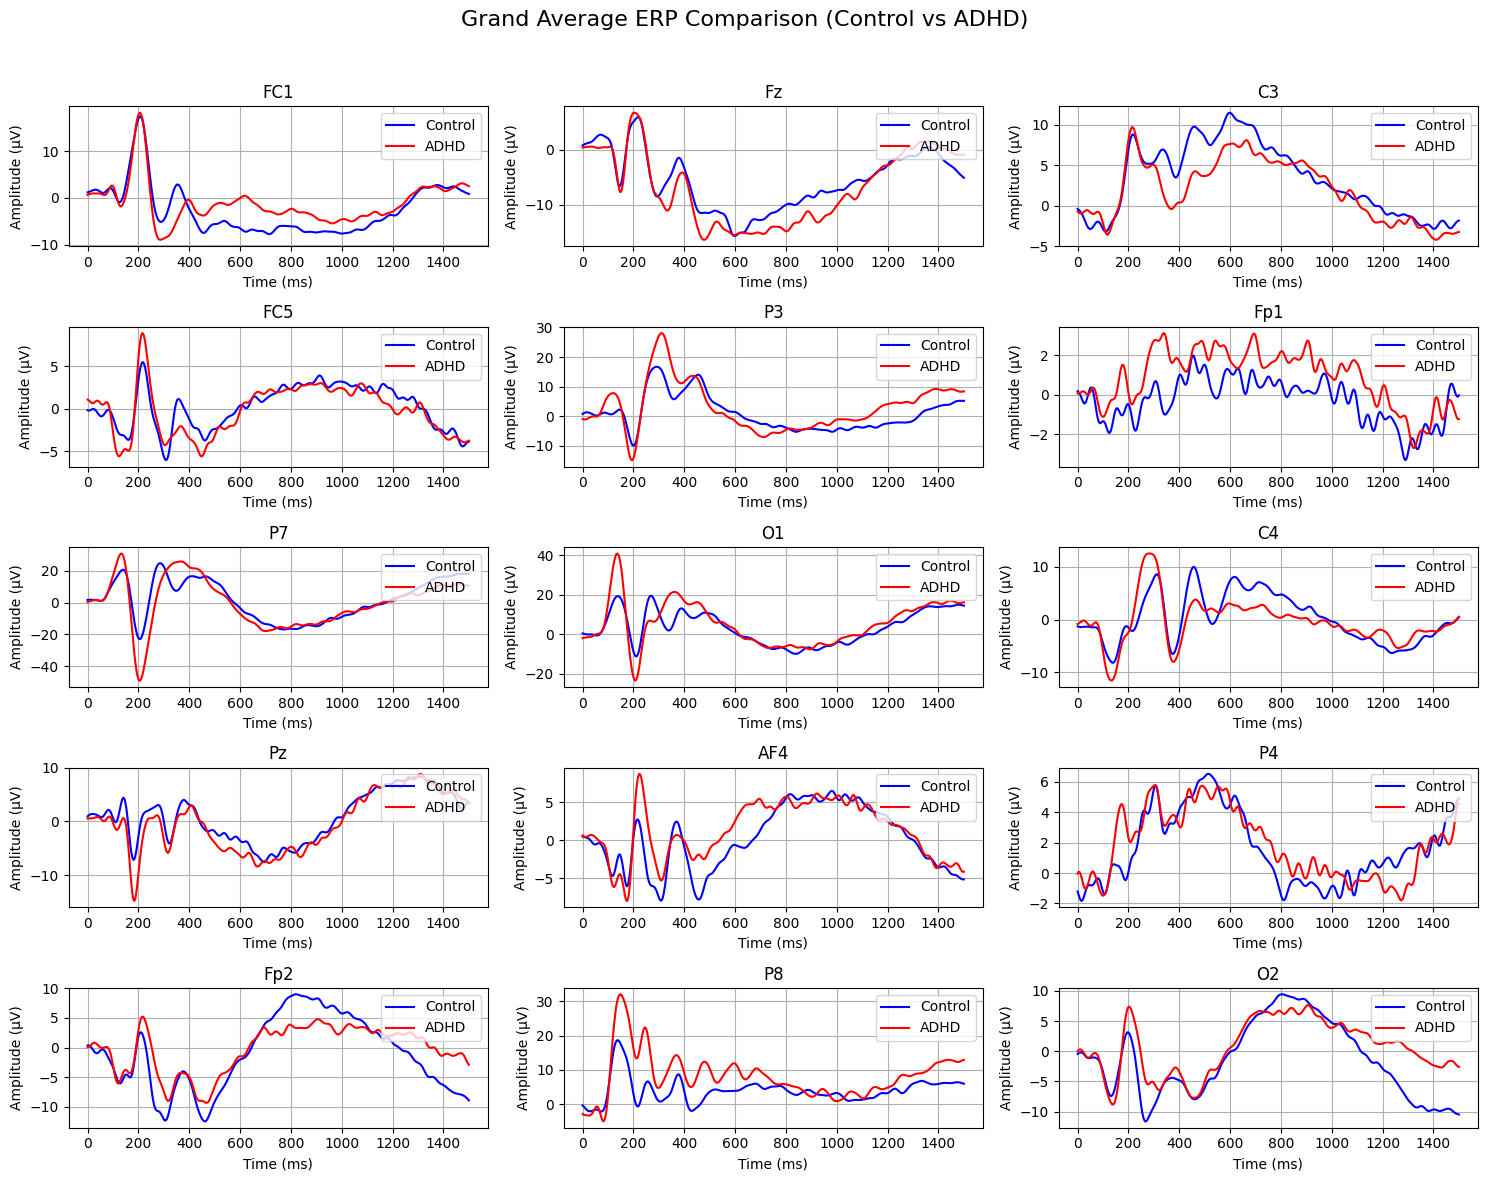

In [11]:
import matplotlib.pyplot as plt
import os

# Set up the figure: 5 rows, 3 columns for 15 channels
fig, axes = plt.subplots(5, 3, figsize=(15, 12))
fig.suptitle('Grand Average ERP Comparison (Control vs ADHD)', fontsize=16)

# Flatten axes array for easy indexing
axes = axes.flatten()

# Plot each channel
for i, ch_name in enumerate(grand_average_control.info['ch_names']):
    ax = axes[i]

    # Plot Control group
    ax.plot(grand_average_control.times * 1000, grand_average_control.data[i], label='Control', color='blue')

    # Plot ADHD group
    ax.plot(grand_average_adhd.times * 1000, grand_average_adhd.data[i], label='ADHD', color='red')

    ax.set_title(ch_name)
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Amplitude (µV)')
    ax.legend(loc='upper right')
    ax.grid(True)

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save the figure
save_dir = "/content/drive/MyDrive/dataset/plots"
os.makedirs(save_dir, exist_ok=True)
plt.savefig(os.path.join(save_dir, "grand_average_erp_comparison.png"), dpi=300)

# Display the figure
plt.show()